In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reaction = pd.read_csv(r'D:\Data_porfolio\Virtual Internship\Accenture Data Analyst\Reactions.csv')
reactiontype = pd.read_csv(r'D:\Data_porfolio\Virtual Internship\Accenture Data Analyst\ReactionTypes.csv')
content = pd.read_csv(r'D:\Data_porfolio\Virtual Internship\Accenture Data Analyst\Content.csv')

In [3]:
reaction.shape

(25553, 5)

In [4]:
reaction.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [5]:
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [6]:
reaction.drop(columns = ['Unnamed: 0','User ID'],inplace = True, axis = 1)

In [7]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    25553 non-null  object
dtypes: object(3)
memory usage: 599.0+ KB


In [8]:
reaction.isnull().sum()

Content ID      0
Type          980
Datetime        0
dtype: int64

In [9]:
reaction.dropna(inplace=True)

In [10]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB


In [11]:
reaction['Datetime'] = pd.to_datetime(reaction['Datetime'])

In [12]:
reactiontype.shape

(16, 4)

In [13]:
reactiontype.columns

Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')

In [14]:
reactiontype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [15]:
reactiontype.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [16]:
reactiontype.drop(columns=['Unnamed: 0', 'Sentiment'], axis = 1, inplace = True)

In [17]:
reactiontype.head()

,Type,Score
0,heart,60
1,want,70
2,disgust,0
3,hate,5
4,interested,30


In [18]:
content.shape

(1000, 6)

In [19]:
content.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [20]:
content.drop(columns = ['Unnamed: 0', 'User ID', 'URL'], axis = 1, inplace = True)

In [21]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Type        1000 non-null   object
 2   Category    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [22]:
content.rename(columns = {'Type' : 'Content type'}, inplace =True)

In [23]:
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [24]:
content['Category'] = content['Category'].str.replace('''"''','')

In [25]:
content['Category'] = content['Category'].str.lower()

In [26]:
content['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [27]:
merge1 = pd.merge(left = reaction, right = content, on = 'Content ID',how='inner')
merge2 = pd.merge(left = merge1, right = reactiontype, on = 'Type',how='inner')
merge2.head()

,Content ID,Type,Datetime,Content type,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,30


In [28]:
category_order = merge2.groupby('Category').agg({'Score':'sum'}).reset_index()
category_order

,Category,Score
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436
5,fitness,55323
6,food,66676
7,healthy eating,69339
8,public speaking,49264
9,science,71168


In [29]:
category_order = category_order.sort_values(by = 'Score', ascending = False)
category_order

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676
2,culture,66579
14,travel,64880
1,cooking,64756
10,soccer,57783
4,education,57436


In [30]:
top_5 = category_order.head()

In [31]:
# dataframes = {
#     'Clean dataset': merge2,
#     'Category score': category_order,
#     'Top 5 categories': top_5
# }

# # Create a Pandas Excel writer using XlsxWriter as the engine
# with pd.ExcelWriter(r'D:\Data_porfolio\Virtual Internship\Accenture Data Analyst\Final dataset.xlsx', engine='xlsxwriter') as writer:
#     for sheet_name, df in dataframes.items():
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

# print("DataFrames have been written to an Excel file with separate sheets.")

In [32]:
merge2

,Content ID,Type,Datetime,Content type,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,30
...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,12


In [34]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Content ID    24573 non-null  object        
 1   Type          24573 non-null  object        
 2   Datetime      24573 non-null  datetime64[ns]
 3   Content type  24573 non-null  object        
 4   Category      24573 non-null  object        
 5   Score         24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.1+ MB


In [35]:
merge2['date'] = merge2['Datetime'].dt.date

In [74]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Content ID    24573 non-null  object        
 1   Type          24573 non-null  object        
 2   Datetime      24573 non-null  datetime64[ns]
 3   Content type  24573 non-null  object        
 4   Category      24573 non-null  object        
 5   Score         24573 non-null  int64         
 6   date          24573 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ MB


In [75]:
merge2['date'] = pd.to_datetime(merge2['date'])
merge2['month'] = merge2['date'].dt.month

In [36]:
top_5

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


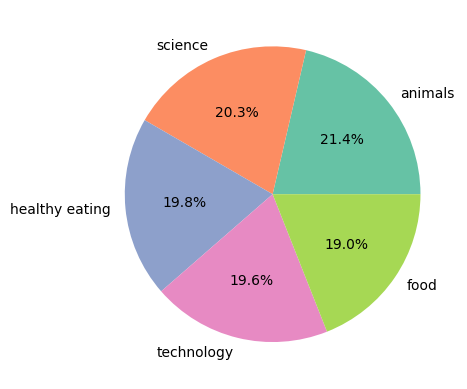

In [102]:
pallete_color = sns.color_palette("Set2")
plt.pie(x = top_5['Score'],labels = top_5['Category'],autopct='%1.1f%%', colors=pallete_color)
plt.savefig('Top 5 category score', transparent = True, pad_inches = 0, bbox_inches = 'tight')
plt.show()

C:\Users\Pritam\AppData\Local\Temp\ipykernel_1112\3487237926.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = category_order['Category'],y=category_order['Score'], palette = pallete_color)
C:\Users\Pritam\AppData\Local\Temp\ipykernel_1112\3487237926.py:1: UserWarning: 
The palette list has fewer values (8) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = category_order['Category'],y=category_order['Score'], palette = pallete_color)


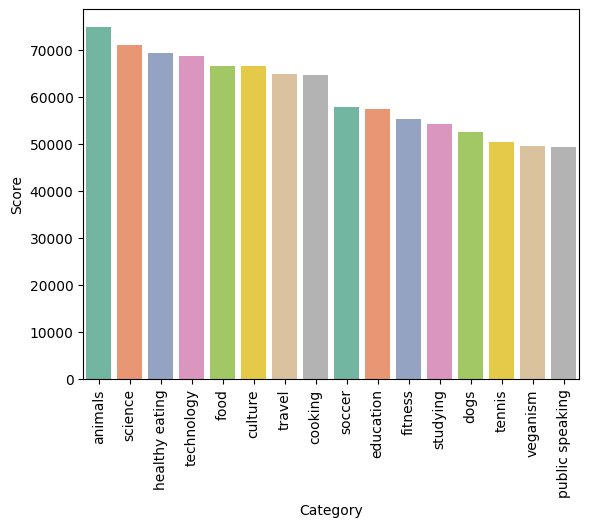

In [101]:
sns.barplot(x = category_order['Category'],y=category_order['Score'], palette = pallete_color)
plt.xticks(rotation=90)
plt.savefig('Category score', transparent = True, pad_inches = 0, bbox_inches = 'tight')
plt.show()

In [79]:
month = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

merge2['month'].replace(month,inplace=True)

In [80]:
merge2['Category'].nunique()

16

In [108]:
merge2.groupby('Category').agg({'Type':'count'}).sort_values(by='Type',ascending=False)

,Type
Category,
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698
culture,1676
cooking,1664
travel,1647
soccer,1457


In [103]:
group = merge2.groupby(['Content ID', 'Category']).agg({'Content ID':'count'})
group.rename(columns = {'Content ID':'Count'},inplace=True)
group.reset_index(inplace=True)
group

,Content ID,Category,Count
0,004e820e-49c3-4ba2-9d02-62db0065410c,tennis,1
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,healthy eating,46
2,01396602-c759-4a17-90f0-8f9b3ca11b30,tennis,40
3,019b61f4-926c-438e-adaf-6119c5eab752,fitness,13
4,01ab84dd-6364-4236-abbb-3f237db77180,food,1
...,...,...,...
957,fdca8d15-966b-4825-8133-1fafc5c1f9fc,dogs,27
958,fe06b730-b1f8-4f55-af1a-52487d8f1ec6,animals,25
959,fea8d77c-fd0b-4678-868f-fbae567642f3,science,6
960,fea9077f-2fe7-43bd-aaef-dc2619988d94,culture,6


In [104]:
Category_data = group.groupby('Category').agg({'Count':'count'})
Category_data.reset_index(inplace=True)
Category_data.sort_values(by = 'Count',ascending=False,inplace=True)
Category_data

,Category,Count
0,animals,69
14,travel,69
12,technology,68
9,science,67
2,culture,65
10,soccer,63
6,food,62
5,fitness,61
1,cooking,60
7,healthy eating,60


In [82]:
merge2['Content ID'].nunique()

962

In [86]:
group1 = merge2.groupby(['Content ID', 'month']).agg({'Content ID':'count'})
group1.rename(columns = {'Content ID':'Count'},inplace=True)
group1.reset_index(inplace=True)
group1

,Content ID,month,Count
0,004e820e-49c3-4ba2-9d02-62db0065410c,Mar,1
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,Apr,6
2,00d0cdf9-5919-4102-bf84-ebde253c3cd2,Aug,3
3,00d0cdf9-5919-4102-bf84-ebde253c3cd2,Dec,5
4,00d0cdf9-5919-4102-bf84-ebde253c3cd2,Feb,2
...,...,...,...
9141,ff883828-a610-492d-8635-8a777eaad25f,Mar,3
9142,ff883828-a610-492d-8635-8a777eaad25f,May,2
9143,ff883828-a610-492d-8635-8a777eaad25f,Nov,2
9144,ff883828-a610-492d-8635-8a777eaad25f,Oct,4


In [91]:
month_data = group1.groupby('month').agg({'Count':'count'})
month_data.reset_index(inplace=True)
month_data.sort_values(by = 'Count',ascending=False,inplace=True)
month_data

,month,Count
4,Jan,781
5,Jul,778
1,Aug,773
10,Oct,771
9,Nov,768
6,Jun,762
8,May,759
2,Dec,756
3,Feb,755
11,Sep,754


C:\Users\Pritam\AppData\Local\Temp\ipykernel_1112\1464261458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = month_data['month'],y=month_data['Count'], palette = pallete_color)
C:\Users\Pritam\AppData\Local\Temp\ipykernel_1112\1464261458.py:2: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = month_data['month'],y=month_data['Count'], palette = pallete_color)


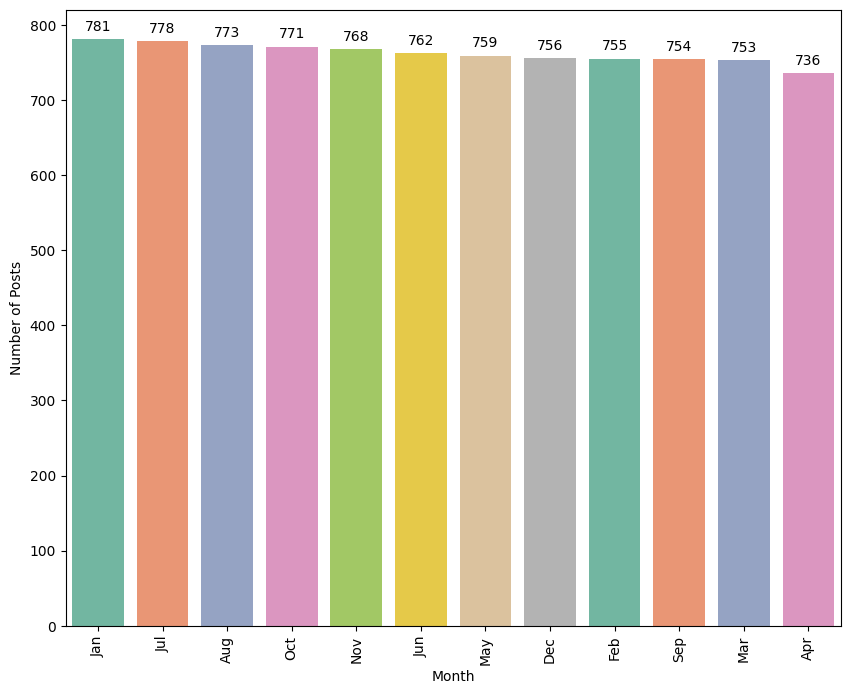

In [119]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = month_data['month'],y=month_data['Count'], palette = pallete_color)
plt.xticks(rotation=90)
plt.ylabel('Number of Posts')
plt.xlabel('Month')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.savefig('Month count', transparent = True, pad_inches = 0, bbox_inches = 'tight')
plt.show()
# plt.savefig('Month count', transparent = False)

In [93]:
merge2['Type'].count()

24573

In [94]:
merge2['Content ID'].nunique()

962

In [109]:
merge2.groupby('month').agg({'Type':'count'}).sort_values(by='Type',ascending=False)

,Type
month,
May,2138
Jan,2126
Aug,2114
Dec,2092
Jul,2070
Oct,2056
Nov,2034
Sep,2022
Jun,2021
